# Phase 1: 

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
train_df = pd.read_json("train.json")
train_df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


In [0]:
train_df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

## Visualization of target variable (interest level)

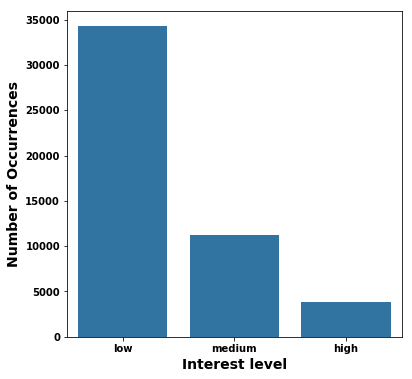

In [0]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(int_level.index, int_level.values, alpha=1, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xlabel('Interest level', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

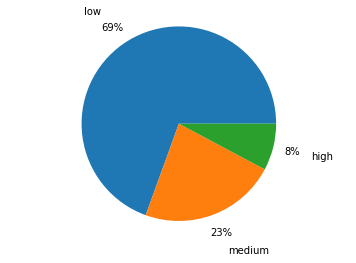

In [0]:
plt.pie(int_level.values,(0,0,0),int_level.index, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.show()

## Hour-wise listing trend

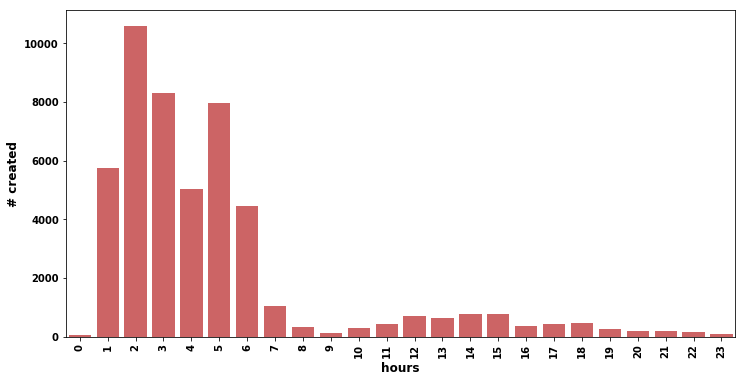

In [0]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["hour_created"] = train_df["created"].dt.hour
hour = train_df['hour_created'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(hour.index, hour.values, alpha=0.8, color=color[3])
plt.xlabel('hours', fontsize=12, fontweight='bold')
plt.ylabel('# created', fontsize=12, fontweight='bold')
plt.xticks(rotation='vertical', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [0]:
top5 = hour[:5]
print("Busiest 5:\n",top5)

('Busiest 5:\n', 2    10596
3     8318
5     7954
1     5749
4     5021
Name: hour_created, dtype: int64)


## Visualizing features

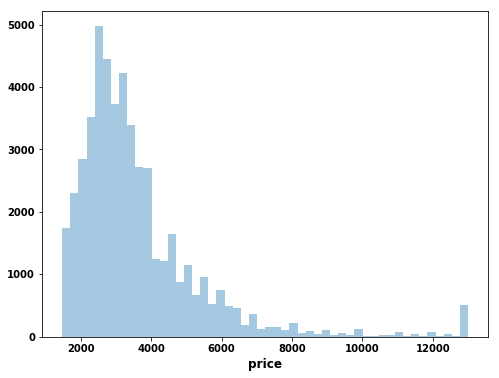

In [0]:
llimit_p = np.percentile(train_df.price.values, 1)
ulimit_p = np.percentile(train_df.price.values, 99)
train_df['price'].loc[train_df['price']<llimit_p] = llimit_p
train_df['price'].loc[train_df['price']>ulimit_p] = ulimit_p

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=False)
plt.xlabel('price', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

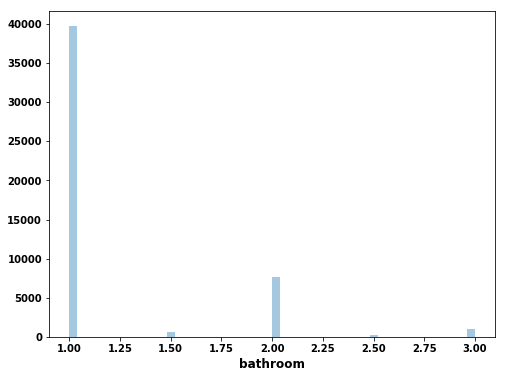

In [0]:
llimit_bath = np.percentile(train_df.bathrooms.values, 1)
ulimit_bath = np.percentile(train_df.bathrooms.values, 99)
train_df['bathrooms'].loc[train_df['bathrooms']<llimit_bath] = llimit_bath
train_df['bathrooms'].loc[train_df['bathrooms']>ulimit_bath] = ulimit_bath

plt.figure(figsize=(8,6))
sns.distplot(train_df.bathrooms.values, kde=False)
plt.xlabel('bathroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

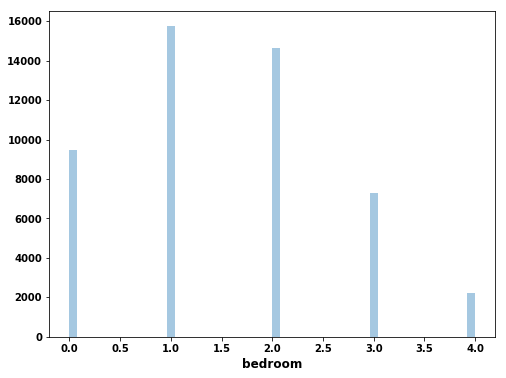

In [0]:
llimit_bed = np.percentile(train_df.bedrooms.values, 1)
ulimit_bed = np.percentile(train_df.bedrooms.values, 99)
train_df['bedrooms'].loc[train_df['bedrooms']<llimit_bed] = llimit_bed
train_df['bedrooms'].loc[train_df['bedrooms']>ulimit_bed] = ulimit_bed

plt.figure(figsize=(8,6))
sns.distplot(train_df.bedrooms.values, kde=False)
plt.xlabel('bedroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

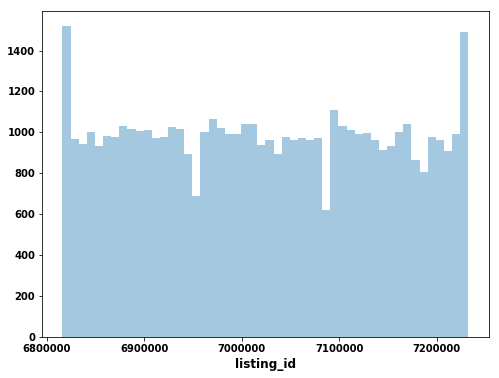

In [0]:
llimit_lid = np.percentile(train_df.listing_id.values, 1)
ulimit_lid = np.percentile(train_df.listing_id.values, 99)
train_df['listing_id'].loc[train_df['listing_id']<llimit_lid] = llimit_lid
train_df['listing_id'].loc[train_df['listing_id']>ulimit_lid] = ulimit_lid

plt.figure(figsize=(8,6))
sns.distplot(train_df.listing_id.values, bins=50, kde=False)
plt.xlabel('listing_id', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

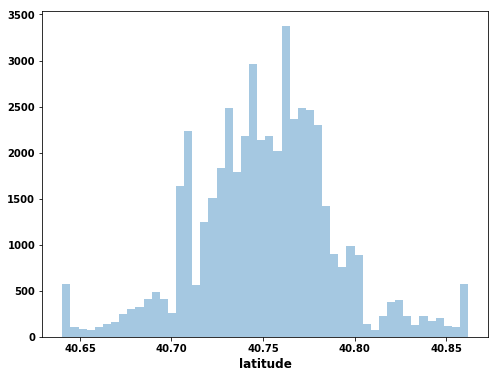

In [0]:
llimit_la = np.percentile(train_df.latitude.values, 1)
ulimit_la = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].loc[train_df['latitude']<llimit_la] = llimit_la
train_df['latitude'].loc[train_df['latitude']>ulimit_la] = ulimit_la

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

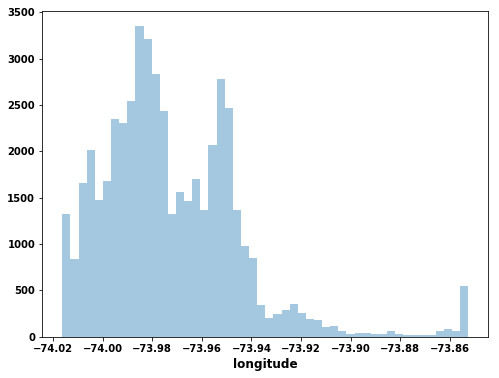

In [0]:
llimit_lo = np.percentile(train_df.longitude.values, 1)
ulimit_lo = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].loc[train_df['longitude']<llimit_lo] = llimit_lo
train_df['longitude'].loc[train_df['longitude']>ulimit_lo] = ulimit_lo

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


## Handling missing values

In [0]:
# check if there are any null/nan values

train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
desc_vect          0
feat_vect          0
dtype: int64

### Bedrooms

In [0]:
train_df.groupby('bedrooms').count()

,bathrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,hour_created
bedrooms,,,,,,,,,,,,,,,
0.0,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475
1.0,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752
2.0,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623
3.0,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276
4.0,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226


In [0]:
train_df.groupby('bedrooms').count().sum()

bathrooms          49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
hour_created       49352
dtype: int64

We found 9475 values with a bedroom count of 0. This is simply too high of a number to assume it is an error. Upon checking some photos, we realized that these are probably studio apartments so no bedrooms makes sense. When we aggregated the count of every value of bedrooms, we found there were no missing values.

### Bathrooms

In [0]:
train_df.groupby('bathrooms').count()

,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,hour_created
bathrooms,,,,,,,,,,,,,,,
1.0,39735,39735,39735,39735,39735,39735,39735,39735,39735,39735,39735,39735,39735,39735,39735
1.5,645,645,645,645,645,645,645,645,645,645,645,645,645,645,645
2.0,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660
2.5,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277
3.0,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035


In [0]:
train_df.groupby('bathrooms').count().sum()

bedrooms           49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
hour_created       49352
dtype: int64

Again, we found no missing values for bathrooms.

### Building ID

In [0]:
#building_id

whichrow = 0
count = 0
for row in train_df['building_id']:
    if row=='0':
        count+=1 or any(c.isalpha() for c in row) == False
        #train_df.loc[train_df.index[whichrow], 'building_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(30)

('number of missing values: ', 8286)


It's unlikely that building ID has any effect on the interest level of a listing so we left these values.

### Description

In [0]:
#description

whichrow = 0
count = 0
for row in train_df['description']:
    if  any(c.isalpha() for c in row) == False:
        count+=1
        train_df.loc[train_df.index[whichrow], 'description'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3336)


### Features

In [0]:
#features

whichrow = 0
count = 0
for row in train_df['features']:
    if row==[]:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'features'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3218)


In [0]:
#created

whichrow = 0
count = 0
for row in train_df['created']:
    if any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'created'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 49352)


In [0]:
#display_address

whichrow = 0
count = 0
for row in train_df['display_address']:
    if any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'display_address'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 141)


In [0]:
#street_address

whichrow = 0
count = 0
for row in train_df['street_address']:
    if any(c.isalpha() for c in row) == False :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'street_address'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 13)


In [0]:
#latitude

whichrow = 0
count = 0
for row in train_df['latitude']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'latitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [0]:
#listing_id

whichrow = 0
count = 0
for row in train_df['listing_id']:
    if row==0 or row=='null':
        count+=1
        #train_df.loc[train_df.index[whichrow], 'listing_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [0]:
#longitude

whichrow = 0
count = 0
for row in train_df['longitude']:
    if row==0 or row=='null':
        count+=1
        #train_df.loc[train_df.index[whichrow], 'longitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 12)


In [0]:
#manager_id

whichrow = 0
count = 0
for row in train_df['manager_id']:
    if  row==0 or any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'manager_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [0]:
#photos

whichrow = 0
count = 0
for row in train_df['photos']:
    if  any(isinstance(c,str) for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'photos'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 49352)


In [0]:
#price

whichrow = 0
count = 0
for row in train_df['price']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [0]:
#interest_level

whichrow = 0
count = 0
list= ["low", "medium", "high"]
for row in train_df['interest_level']:
    if row not in list :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'interest_level'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [0]:
#print( train_df['photos'])

In [0]:
#pd.options.display.max_colwidth = 10

## Handling outliers

In [4]:
q25, q75 = np.percentile(train_df['price'].values, 25), np.percentile(train_df['price'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5

# calculate inner tukey fences 
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['price'].values if x > upper or x < lower]
len(outliers)

2788

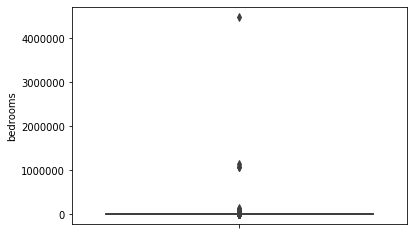

In [16]:
sns.boxplot(y=train_df['price'])

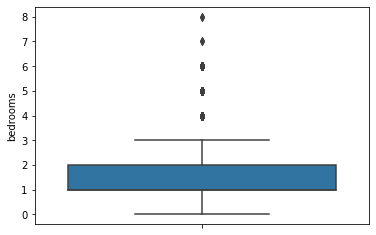

In [17]:
sns.boxplot(y=train_df['bedrooms'])

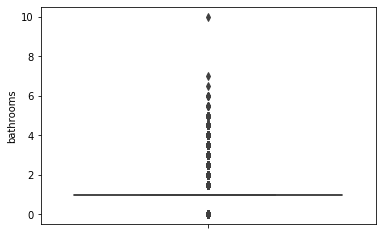

In [18]:
sns.boxplot(y=train_df['bathrooms'])

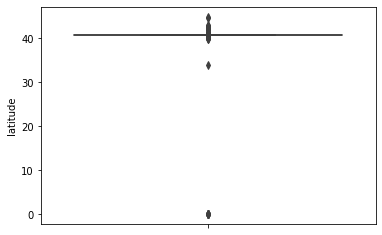

In [19]:
sns.boxplot(y=train_df['latitude'])

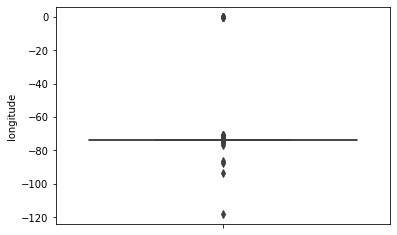

In [20]:
sns.boxplot(y=train_df['longitude'])

In [10]:
#train_df.loc[train_df['price'].idxmax()] this shit is like avg 16k/6.5k 

bathrooms                                                          1
bedrooms                                                           2
building_id                         cd25bbea2af848ebe9821da820b725da
created                                          2016-06-24 05:02:11
description                                                         
display_address                                        Hudson Street
features           [Doorman, Elevator, Cats Allowed, Dogs Allowed...
latitude                                                     40.7299
listing_id                                                   7208764
longitude                                                   -74.0071
manager_id                          d1737922fe92ccb0dc37ba85589e6415
photos                                                            []
price                                                        4490000
street_address                                     421 Hudson Street
interest_level                    

In [0]:

whichrow = 0
count =0
for row in train_df['price']:
    if row<llimit_p/2 or row>ulimit_p*2:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

        

('number of outliers: ', 76)


In [0]:
whichrow = 0
count =0
for row in train_df['latitude']:
    if row<llimit_la or row>ulimit_la:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)


In [0]:
whichrow = 0
count =0
for row in train_df['longitude']:
    if row<llimit_lo or row>ulimit_lo:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)


In [0]:
whichrow = 0
count =0
for row in train_df['bathrooms']:
    if row>ulimit_bath:
    #if row<llimit_bath or row>ulimit_bath:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

In [0]:
whichrow = 0
count =0
for row in train_df['bedrooms']:
    if row<llimit_bed or row>ulimit_bed:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

## Text feature extraction

### Encode unicode to strings

In [0]:
train_df['description'] = train_df['description'].apply(lambda x: x.encode('utf-8').strip())

In [0]:
# vectorize each description into a new column by frequency
# common stop words are excluded like a, the, in, etc.
# matches tokens of length 2+

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', token_pattern=r'^[a-zA-Z][a-zA-Z]+')
vectorizer.fit(train_df['description'].values)
train_df['desc_vect'] = train_df['description'].apply(lambda x: vectorizer.transform([x]))
#vectorizer.vocabulary_  #shows all tokens

In [0]:
# vectorize each description into a new column by count
# matches words of lenght 2+

vectorizer = CountVectorizer(token_pattern=r'^[a-zA-Z][a-zA-Z]+', stop_words='english')
vectorizer.fit(train_df['description'].values)
#train_df['desc_vect'] = train_df['description'].apply(lambda x: vectorizer.transform([x]))


CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='^[a-zA-Z][a-zA-Z]+',
        tokenizer=None, vocabulary=None)

In [0]:
# convert features list to string
train_df['features'] = train_df['features'].apply(lambda x: ' '.join(x))

In [0]:
# vectorize features in new column by count

vectorizer.fit(train_df['features'].values)
train_df['feat_vect'] = train_df['features'].apply(lambda x: vectorizer.transform([x]))
# vectorizer.vocabulary_  #shows all tokens

{u'absolute': 0,
 u'actual': 1,
 u'air': 2,
 u'assigned': 3,
 u'available': 4,
 u'balcony': 5,
 u'bike': 6,
 u'brand': 7,
 u'building': 8,
 u'cable': 9,
 u'cats': 10,
 u'childrens': 11,
 u'close': 12,
 u'common': 13,
 u'courtyard': 14,
 u'deck': 15,
 u'deco': 16,
 u'decorative': 17,
 u'dining': 18,
 u'dishwasher': 19,
 u'dogs': 20,
 u'doorman': 21,
 u'duplex': 22,
 u'dw': 23,
 u'eat': 24,
 u'elevator': 25,
 u'exclusive': 26,
 u'exposed': 27,
 u'fireplace': 28,
 u'fitness': 29,
 u'french': 30,
 u'furnished': 31,
 u'garage': 32,
 u'garden': 33,
 u'gramercy': 34,
 u'great': 35,
 u'gut': 36,
 u'gym': 37,
 u'half': 38,
 u'hardwood': 39,
 u'high': 40,
 u'laundry': 41,
 u'live': 42,
 u'loft': 43,
 u'low': 44,
 u'multi': 45,
 u'new': 46,
 u'newly': 47,
 u'nyu': 48,
 u'offering': 49,
 u'outdoor': 50,
 u'parking': 51,
 u'patio': 52,
 u'pets': 53,
 u'pool': 54,
 u'postwar': 55,
 u'pre': 56,
 u'prewar': 57,
 u'private': 58,
 u'queen': 59,
 u'recreational': 60,
 u'reduced': 61,
 u'renovated': 62,
 

## Image feature extraction